In [ ]:
# Load train dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load train and test dataset
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Apply or between 'Death' and 'Transplantation' columns due to the fact would probably died if not applied transplant
train['Death'] = train['Death'] | train['Transplantation']
train = train.drop('Transplantation', axis=1)
test['Death'] = test['Death'] | test['Transplantation']
test = test.drop('Transplantation', axis=1)

# Save new train and test datasets
train.to_csv('data/train_2y.csv', index=False)
test.to_csv('data/test_2y.csv', index=False)

# Delete column 'RadioWorsening2y'

train = train.drop('RadioWorsening2y', axis=1)
test = test.drop('RadioWorsening2y', axis=1)

# Save new train and test datasets
train.to_csv('data/train_1y.csv', index=False)
test.to_csv('data/test_1y.csv', index=False)

# Delete columns 'FVC (L) 1 year after diagnosis', 'FVC (%) 1 year after diagnosis', 'DLCO (%) 1 year after diagnosis'

train = train.drop(['FVC (L) 1 year after diagnosis', 'FVC (%) 1 year after diagnosis', 'DLCO (%) 1 year after diagnosis'], axis=1)
test = test.drop(['FVC (L) 1 year after diagnosis', 'FVC (%) 1 year after diagnosis', 'DLCO (%) 1 year after diagnosis'], axis=1)

# Save new train and test datasets
train.to_csv('data/train_0y.csv', index=False)
test.to_csv('data/test_0y.csv', index=False)

# TRIAN MODELS

In [ ]:
# Plot of death columns and progressive disease

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
train['Death'].value_counts().plot(kind='bar', ax=ax[0])
train['Progressive disease'].value_counts().plot(kind='bar', ax=ax[1])
plt.show()

In [7]:
from tabpfn import TabPFNClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

train = pd.read_csv('../data/train_0y.csv')
test = pd.read_csv('../data/test_0y.csv')

# Separate features (X) and targets (y) for both cases
X_train = train.drop(columns=['Death', 'Progressive disease'])
y_train_death = train['Death']
y_train_progressive = train['Progressive disease']

X_test = test.drop(columns=['Death', 'Progressive disease'])
y_test_death = test['Death']
y_test_progressive = test['Progressive disease']

# Initialize TabPFN for Death Prediction
model_death = TabPFNClassifier(device='cpu', N_ensemble_configurations=1000)
model_death.fit(X_train, y_train_death)
y_pred_death = model_death.predict(X_test)

# Evaluate Death Prediction
print("Death Prediction Report:")
print(classification_report(y_test_death, y_pred_death))
print("Accuracy Score (Death):", accuracy_score(y_test_death, y_pred_death))

# Initialize TabPFN for Progressive Disease Prediction
model_progressive = TabPFNClassifier(device='cpu', N_ensemble_configurations=1000)
model_progressive.fit(X_train, y_train_progressive)
y_pred_progressive = model_progressive.predict(X_test)

# Evaluate Progressive Disease Prediction
print("\nProgressive Disease Prediction Report:")
print(classification_report(y_test_progressive, y_pred_progressive))
print("Accuracy Score (Progressive Disease):", accuracy_score(y_test_progressive, y_pred_progressive))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  r

Death Prediction Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        23
           1       0.83      0.50      0.62        10

    accuracy                           0.82        33
   macro avg       0.82      0.73      0.75        33
weighted avg       0.82      0.82      0.80        33

Accuracy Score (Death): 0.8181818181818182


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  r


Progressive Disease Prediction Report:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        18
           1       0.67      0.80      0.73        15

    accuracy                           0.73        33
   macro avg       0.73      0.73      0.73        33
weighted avg       0.74      0.73      0.73        33

Accuracy Score (Progressive Disease): 0.7272727272727273


# Load death and prog models for y0

In [5]:
import lightgbm as lgb

# Route to save models
death_model_route = 'model_weights/death_model_y0.txt'
progressive_model_route = 'model_weights/prog_model_y0.txt'

# Load the models
death_model = lgb.Booster(model_file=death_model_route)
progressive_model = lgb.Booster(model_file=progressive_model_route)

[0.93377409 0.98823523 0.99163134 0.98968722 0.84986651 0.80640353
 0.98028069 0.98088868 0.99020636 0.82885022 0.95344835 0.82427193
 0.94435612 0.80640353 0.9444938  0.9427955  0.93377409 0.94435612
 0.98961542 0.94435612 0.9427955  0.93377409 0.80640353 0.93377409
 0.94435612 0.95344835 0.93377409 0.9427955  0.98991795 0.9444938
 0.93377409 0.97702681 0.80640353]
Loaded Model Accuracy: 0.30303030303030304
Loaded Model Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.30      1.00      0.47        10

    accuracy                           0.30        33
   macro avg       0.15      0.50      0.23        33
weighted avg       0.09      0.30      0.14        33

Confusion Matrix:
 [[ 0 23]
 [ 0 10]]


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


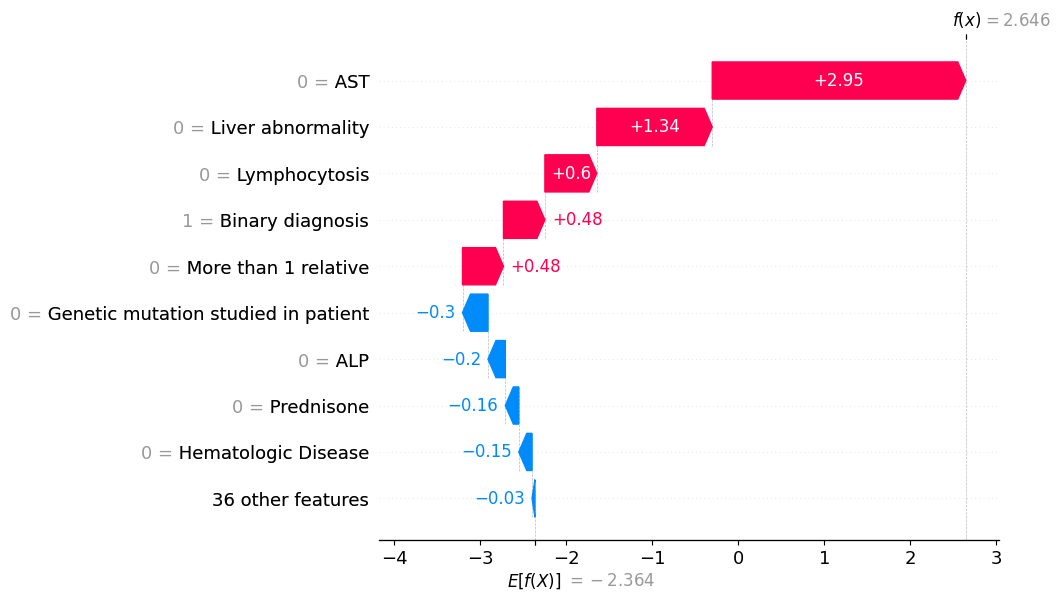

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


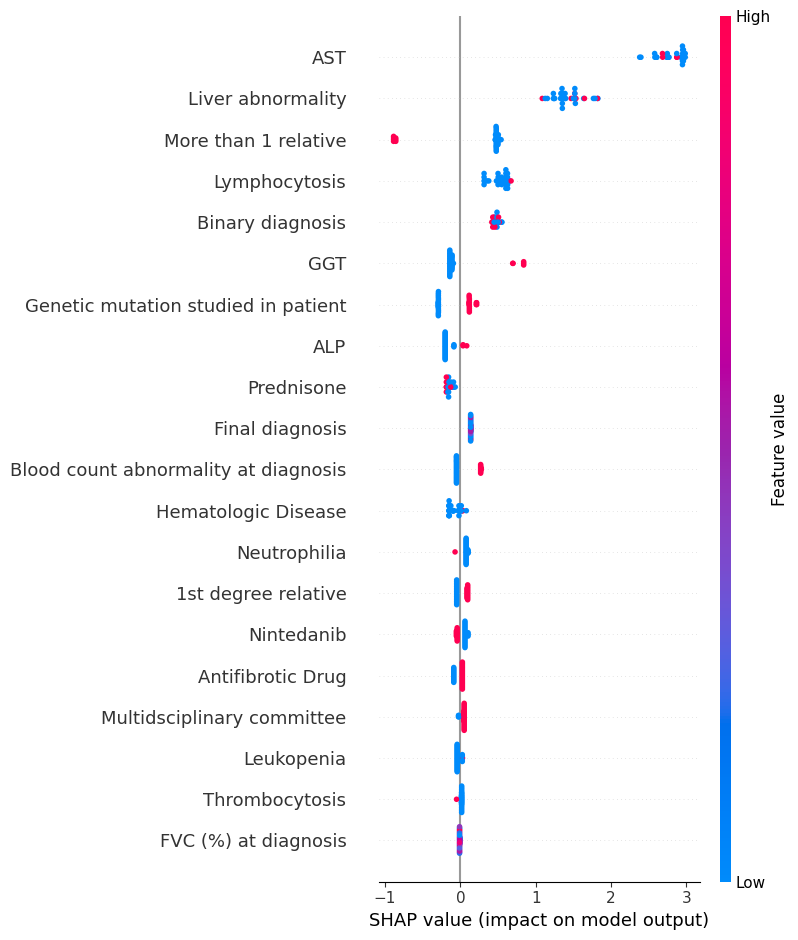

[9.86270857e-01 6.52059089e-02 7.49694879e-02 9.18459916e-01
 4.81055696e-02 3.26891497e-01 8.02899233e-01 1.25958387e-02
 9.52412827e-01 9.21427913e-01 8.14416441e-04 6.65992122e-01
 4.05049013e-01 2.16268268e-01 7.80524645e-01 4.66335893e-01
 8.16220395e-03 2.54446310e-01 2.58910786e-02 3.14609838e-01
 5.73352032e-02 1.03246845e-01 1.87019505e-01 1.28906656e-02
 2.62795859e-01 7.16147034e-03 1.09357708e-01 5.51534690e-03
 5.07510076e-01 4.15494877e-03 5.76414777e-03 9.90524434e-01
 1.55177984e-01]
New Model Accuracy: 0.7272727272727273
New Model Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81        23
           1       0.56      0.50      0.53        10

    accuracy                           0.73        33
   macro avg       0.67      0.66      0.67        33
weighted avg       0.72      0.73      0.72        33

Confusion Matrix (New Model):
 [[19  4]
 [ 5  5]]


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


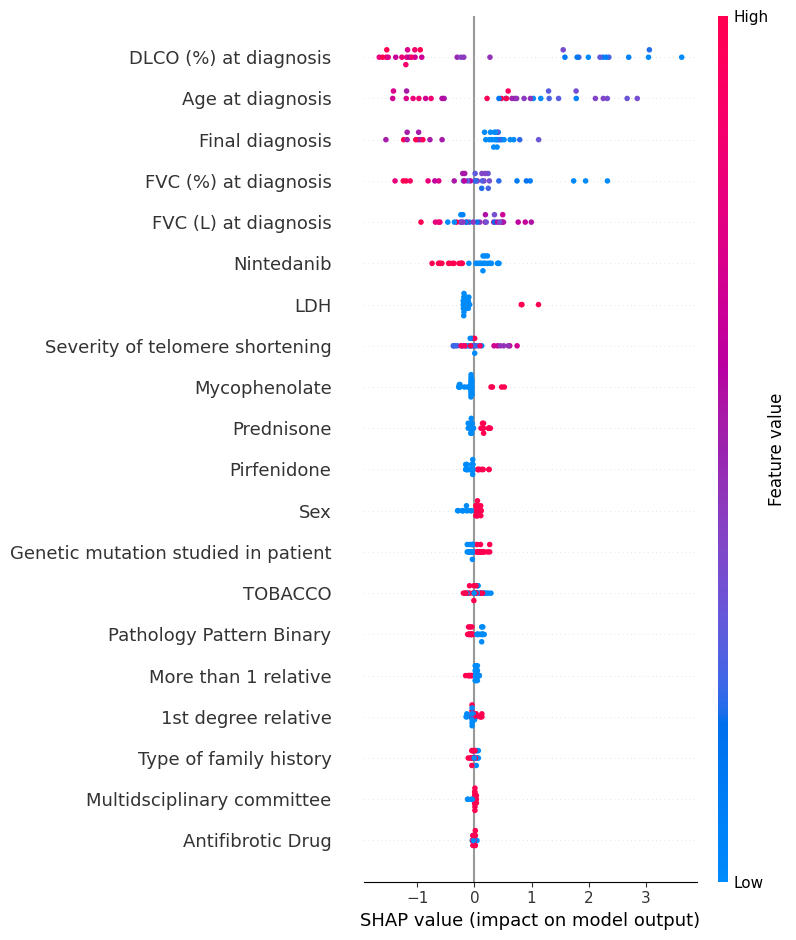

In [42]:
import lightgbm as lgb
import shap
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load models
death_model_route = 'caca.txt'
death_model = lgb.Booster(model_file=death_model_route)
death_model.params['objective'] = 'binary'  # Asegúrate de que el objetivo sea clasificación binaria


# Load datasets
X_train = pd.read_csv('../data/train_0y.csv')
X_test = pd.read_csv('../data/test_0y.csv')
y_train = X_train['Death']
y_test = X_test['Death']

# Drop Death and Progressive Disease columns
X_train = X_train.drop(columns=['Death', 'Progressive disease'])
X_test = X_test.drop(columns=['Death', 'Progressive disease'])

# Evaluate the loaded model with explicit thresholding
y_pred_loaded_probs = death_model.predict(X_test)  # Get probabilities
print(y_pred_loaded_probs)
y_pred_loaded = (y_pred_loaded_probs >= 0.5).astype(int)  # Apply threshold

# Evaluate loaded model
print("Loaded Model Accuracy:", accuracy_score(y_test, y_pred_loaded))
print("Loaded Model Report:\n", classification_report(y_test, y_pred_loaded, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_loaded))

# SHAP for individual prediction (Death Model)
explainer_death = shap.TreeExplainer(death_model)

# Explain a single instance (alternative to force_plot)
instance_index = 0
instance = X_test.iloc[[instance_index]]  # 2D structure for SHAP
shap_values_death = explainer_death.shap_values(instance)

# Visualize SHAP explanation for the instance using waterfall plot
shap.waterfall_plot(
    shap.Explanation(values=shap_values_death[1][0], base_values=explainer_death.expected_value[1], data=instance.iloc[0])
)

# Global SHAP analysis (summary plot)
shap_values_death_global = explainer_death.shap_values(X_test)
shap.summary_plot(shap_values_death_global[1], X_test)

# Feature importance and top-k feature selection
mean_shap_importance = np.abs(shap_values_death_global[1]).mean(axis=0)
feature_importance = pd.DataFrame({'feature': X_test.columns, 'importance': mean_shap_importance})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
k = 45
top_k_features = feature_importance.head(k)['feature'].tolist()

# Train a new model with top-k features
X_train_top_k = X_train[top_k_features]
X_test_top_k = X_test[top_k_features]

# Suppress LightGBM training output
new_model = lgb.LGBMClassifier(verbosity=-1)
new_model.fit(X_train_top_k, y_train)

# Evaluate the new model
y_pred_new_probs = new_model.predict_proba(X_test_top_k)[:, 1]
print(y_pred_new_probs)
y_pred_new = (y_pred_new_probs >= 0.5).astype(int)

print("New Model Accuracy:", accuracy_score(y_test, y_pred_new))
print("New Model Report:\n", classification_report(y_test, y_pred_new, zero_division=0))
print("Confusion Matrix (New Model):\n", confusion_matrix(y_test, y_pred_new))

# Save new model
new_model_route = 'caca.txt'
new_model.booster_.save_model(new_model_route)

# SHAP for new model
explainer_new_model = shap.TreeExplainer(new_model)
shap_values_new_global = explainer_new_model.shap_values(X_test_top_k)
shap.summary_plot(shap_values_new_global[1], X_test_top_k)
